Train with just koopman matrix and then adding sequence model later


In [1]:
import os
os.chdir("../../")
print(os.getcwd())

d:\PhD_Projects\Mori-Zwanzig-Autoencoder


In [2]:
import torch, pickle, os
from torch.utils.data import Dataset, DataLoader
from src.PreProc_Data.DataProc import StackedSequenceDataset
import numpy as np
from src.Eval_MZA import Eval_MZA
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
torch.cuda.empty_cache()
exp_dir   = "F:/PhD_Projects/MZA_Cluster_Models/Exp4.2.5.3_Transient_2DCyl_MULTISTEP_numobstest_nostateevo"
# pickle.load(open("Trained_Models/Cluster_Models/Exp4.2.4_Transient_2DCyl_MULTISTEP_numobstest_with_seqmodel_switch/sl33_nhu40_numobs3_bs16_lr5e-5_ph10/args"))
models = []


exp_name_list = [
                 "sl33_nhu40_numobs2_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs3_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs4_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs5_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs8_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs10_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs16_bs16_lr5e-5_ph10_TMres_nostateevo",\
                 "sl33_nhu40_numobs32_bs16_lr5e-5_ph10_TMres_nostateevo",\
                
                 ]
for exp_name in exp_name_list:#os.listdir(exp_dir):
    if exp_name != "results" and exp_name != ".DS_Store":
        print(exp_name)
        models.append(Eval_MZA(exp_dir, exp_name))
models
# eval_mza = Eval_MZA(exp_dir, exp_name)

sl33_nhu40_numobs2_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs3_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs4_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs5_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs8_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs10_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs16_bs16_lr5e-5_ph10_TMres_nostateevo
sl33_nhu40_numobs32_bs16_lr5e-5_ph10_TMres_nostateevo


In [4]:
models[0].deactivate_seqmodel

False

Epoch with Minimum train_error:  7956


d:\PhD_Projects\Mori-Zwanzig-Autoencoder\src\Eval_MZA.py:344: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig(self.exp_dir+'/'+self.exp_name+"/out_log/StateLoss.png", dpi = 256, facecolor = 'w', bbox_inches='tight')


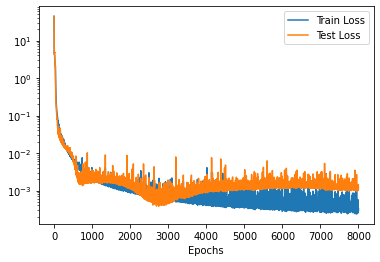

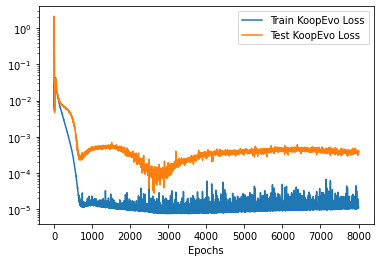

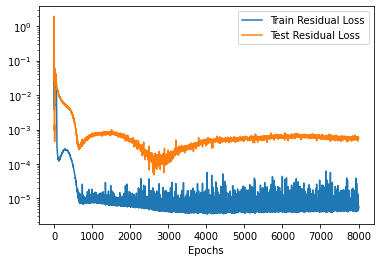

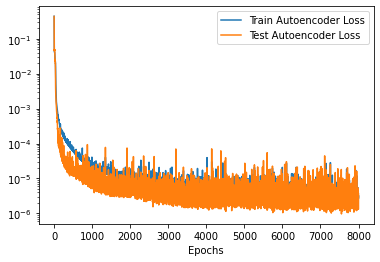

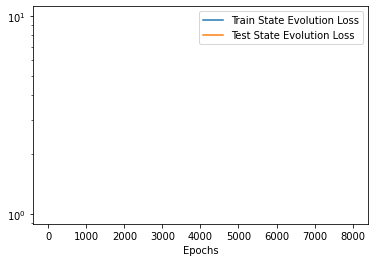

In [5]:
#Sort Models
# def param_find(model):
#     return model.seq_len
# models.sort(key = param_find)

# for model in models:
#     print(model.exp_name)

#plot learning curves
models[0].plot_learning_curves()

In [6]:
#loading weights
# epoch_num = 1700

# #Non Transient data
# for i in range(len(models)):
#     if i==0:
#         epoch_num = 8059
#     elif i == 1:
#         epoch_num = 4999
#     elif i == 7:
#         epoch_num = 2990
#     else:
#         epoch_num = 2990
#     models[i].load_weights(epoch_num)

# # Transient Data with numobs3 and 5
# for i in range(0,len(models)):
#     if i == 0:
#         epoch_num = 4150
#     elif i == 1:
#         epoch_num = 3075
#     elif i == 2:
#         epoch_num = 4000  
#     elif i == 3:
#         epoch_num = 3000
#     elif i == 4:
#         epoch_num = 4600
#     models[i].load_weights(epoch_num)

# Transient Data with numobs5 only
for i in range(0,len(models)):
    epoch_num = 7999
    models[i].load_weights(epoch_num, True)

In [7]:
# for i in range(0,len(models)):

ph0 = models[0].pred_horizon 
models[0].pred_horizon = 1


In [8]:
#One Step Prediction
model_num = 0
# models[model_num].data_dir = models[-2].data_dir
models[model_num].load_and_preproc_data()
models[model_num].create_dataset(mode = "Train")
dataset = models[model_num].train_dataset
num_trajs = models[model_num].train_num_trajs

# eval_mza.train_size = 0.9
for i in range(1):#len(models)):
    i=model_num
    # del eval_mza.lp_data 
    # torch.cuda.empty_cache()
    # del eval_mza.train_dataset
    # del eval_mza.train_dataloader
    if not models[i].deactivate_seqmodel:
        x_nn_hat, Phi_nn_hat, x_nn, Phi_nn, State_MSE, koop_out, seqmodel_out = models[i].predict_onestep(dataset, num_trajs)
    else:
        x_nn_hat, Phi_nn_hat, x_nn, Phi_nn, State_MSE = models[i].predict_onestep(dataset, num_trajs)
    print(x_nn_hat.shape, Phi_nn_hat.shape, Phi_nn.shape)

    #Plotting one step prediction
    x_nn_hat.shape

models[0].pred_horizon = ph0


Data Shape:  (1, 671, 7938)
Not normalizing Input
Train_Shape:  (1, 664, 7938)
out of train
torch.Size([1, 663, 2]) torch.Size([1, 663, 7938]) torch.Size([1, 663, 7938])


d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\rnn.py:769: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:968.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


In [9]:
#Load Data
with open('Data/2DCylinder/processed_data/pklfiles/nektar_cyl_data_20_dt0.25_T200.pkl', 'rb') as f:
    data_dict = pickle.load(f)


In [10]:
sub_X = data_dict["sub_X"]
sub_Y = data_dict["sub_Y"]
U_nn = Phi_nn_hat[...,:int(Phi_nn_hat.shape[-1]/2)].detach().cpu().numpy()
V_nn = Phi_nn_hat[...,int(Phi_nn_hat.shape[-1]/2):].detach().cpu().numpy()
U = Phi_nn[...,:int(Phi_nn.shape[-1]/2)].detach().cpu().numpy()
V = Phi_nn[...,int(Phi_nn.shape[-1]/2):].detach().cpu().numpy()

U_nn.shape, V_nn.shape, U.shape, V.shape


((1, 663, 3969), (1, 663, 3969), (1, 663, 3969), (1, 663, 3969))

In [11]:
def energy(u,v):
    k = 0.5*(np.mean(u**2,axis=-1) + np.mean(v**2,axis=-1))
    return k

k_pred = energy(U_nn,V_nn)
k = energy(U, V)

(1, 663)


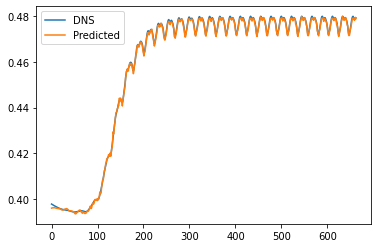

In [11]:
print(k.shape)
plt.plot(k[0,:], label = "DNS")
plt.plot(k_pred[0,:], label = "Predicted")
plt.legend()

In [ ]:
for i in range(100,150):
    plt.figure()
    plt.scatter(sub_X,sub_Y,c=abs((U_nn[0,i]-U[0,i])/U[0,i]), s=1, cmap = 'coolwarm')
    cbar = plt.colorbar()
    # Set the colorbar limits
    cbar.mappable.set_clim(vmin=0, vmax=0.1)
    plt.gca().set_aspect('equal')

    # plt.savefig(models[-3].exp_dir + "/" + models[-3].exp_name + "/error_pred/")

# plt.axes().set_aspect('equal')

In [ ]:
for i in range (1):
    plt.figure()
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,0], label = "Predicted")
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], label = "DNS")
    plt.legend()

plt.ylabel("u0")
plt.xlabel("Timesteps")
plt.figure()
plt.semilogy(State_MSE.cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")
plt.legend()

In [ ]:
for i in range (1):
    plt.figure()
    plt.plot(koop_out.cpu().numpy()[i,:,1], label = "Koopman Predicted")
    plt.plot(seqmodel_out.cpu().numpy()[i,:,1], label = "Seqmodel Predicted")
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,1], label = "DNS")
    plt.legend()

plt.figure()
plt.semilogy(State_MSE.cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")
plt.legend()

Multi Step prediction

In [13]:
for i in [0,1,2,3,4,5,6,7]:
    models[i].deactivate_seqmodel = True

In [87]:
#multistep prediction
timesteps = 1000
initial_step = 0
initial_conditions = Phi_nn[:,initial_step,:].to(models[0].device)

x_ms_hat, xkoop_ms_hat, xseq_ms_hat = [], [], []
Phi_ms_hat = torch.zeros((len(models),1,timesteps+1,models[0].statedim)).to(models[0].device)
Phi_ms_koop = torch.zeros((len(models),1,timesteps,models[0].statedim)).to(models[0].device)

print("ic shape:", initial_conditions.shape)

for i in range(len(models)):
    x_hat_temp, Phi_ms_hat[i], Phi_ms_koop[i], xkoop_hat_temp, xseq_hat_temp = models[i].predict_multistep(initial_conditions, timesteps)
    x_ms_hat.append(x_hat_temp)
    xkoop_ms_hat.append(xkoop_hat_temp)
    xseq_ms_hat.append(xseq_hat_temp)
print(Phi_ms_hat.shape, Phi_ms_koop.shape)


ic shape: torch.Size([1, 7938])
torch.Size([8, 1, 1001, 7938]) torch.Size([8, 1, 1000, 7938])


In [88]:
U_ms_hat = Phi_ms_hat[...,:int(Phi_ms_hat.shape[-1]/2)].detach().cpu().numpy()
V_ms_hat = Phi_ms_hat[...,int(Phi_ms_hat.shape[-1]/2):].detach().cpu().numpy()
U = Phi_nn[...,:int(Phi_nn.shape[-1]/2)].detach().cpu().numpy()
V = Phi_nn[...,int(Phi_nn.shape[-1]/2):].detach().cpu().numpy()

U_ms_hat.shape, V_ms_hat.shape, U.shape, V.shape

((8, 1, 1001, 3969), (8, 1, 1001, 3969), (1, 663, 3969), (1, 663, 3969))

(8, 1, 1001)


Text(0, 0.5, 'Kinetic Energy')

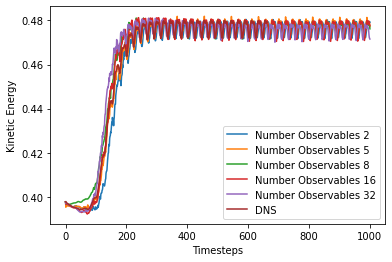

In [89]:
#calculating kinetic energy for multistep prediction
k_ms_pred = energy(U_ms_hat, V_ms_hat)
print(k_ms_pred.shape)
plt.figure()
for i in [0,3,4,6,7]:
    plt.plot(k_ms_pred[i,0,:], label = f"Number Observables {models[i].num_obs}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.plot(k[0,initial_step:], label = "DNS",color = "brown")

plt.legend(loc='lower right')
plt.xlabel("Timesteps")
plt.ylabel("Kinetic Energy")

In [20]:
U_ms_koop = Phi_ms_koop[...,:int(Phi_ms_koop.shape[-1]/2)].detach().cpu().numpy()
V_ms_koop = Phi_ms_koop[...,int(Phi_ms_koop.shape[-1]/2):].detach().cpu().numpy()

U_ms_koop.shape, V_ms_koop.shape

((8, 1, 1000, 3969), (8, 1, 1000, 3969))

(8, 1, 1000)


Text(0, 0.5, 'kinetic energy')

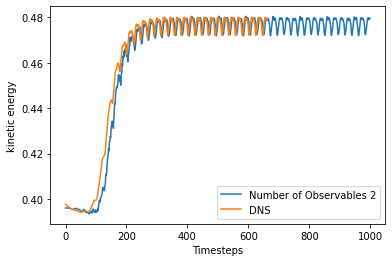

In [37]:
#calculating kinetic energy for multistep prediction
k_ms_koop = energy(U_ms_koop, V_ms_koop)
print(k_ms_koop.shape)
plt.figure()
for i in [0]:
    
    plt.plot(k_ms_koop[i,0,:], label = f"Number of Observables {models[i].num_obs}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.plot(k[0,initial_step:], label = "DNS")

plt.legend(loc='lower right')
plt.xlabel("Timesteps")
plt.ylabel("kinetic energy")

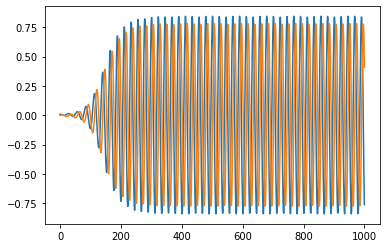

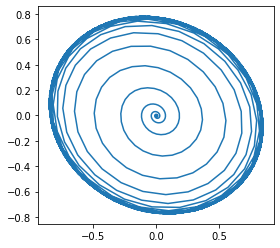

In [22]:
#plotting mode evolution
plt.figure()
model_num = 0
for n in [0,1]:#range(models[model_num].num_obs):
    plt.plot(x_ms_hat[model_num][0,:,n].cpu().numpy(), label = f"Mode {n}")

plt.figure()
plt.gca().set_aspect('equal')
plt.plot(x_ms_hat[model_num][0,:,0].cpu().numpy(), x_ms_hat[model_num][0,:,1].cpu().numpy())

Text(0, 0.5, '$\\mathcal{K}(x_{2})$')

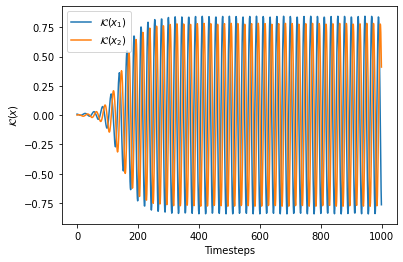

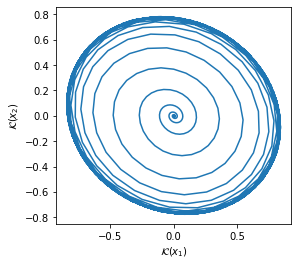

In [45]:
#plotting mode evolution
plt.figure()
model_num = 0
for n in [0,1]:#range(models[model_num].num_obs):
    plt.plot(xkoop_ms_hat[model_num][0,:,n].cpu().numpy(), label = r"$\mathcal{K}$"+f"$(x_{n+1})$")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel(r"$\mathcal{K}(x)$")


plt.figure()
plt.gca().set_aspect('equal')
plt.plot(xkoop_ms_hat[model_num][0,:,0].cpu().numpy(), xkoop_ms_hat[model_num][0,:,1].cpu().numpy())

plt.xlabel(r"$\mathcal{K}(x_{1})$")
plt.ylabel(r"$\mathcal{K}(x_{2})$")

Text(0, 0.5, 'Observables $  L_{2} Norm$')

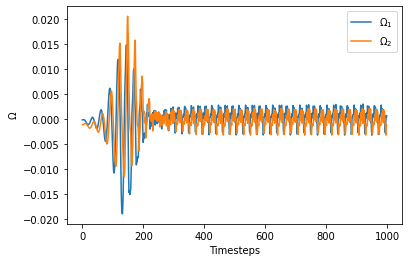

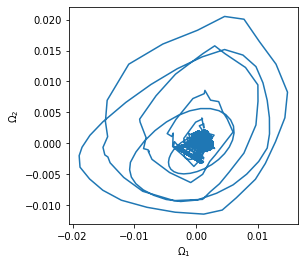

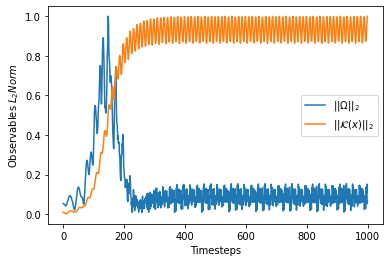

In [65]:
#plotting mode evolution
plt.figure()
model_num = 0
tgt_xseq_ms_hat = xseq_ms_hat[model_num].cpu().numpy()
tgt_xkoop_ms_hat = xkoop_ms_hat[model_num].cpu().numpy()
for n in [0,1]:#range(models[model_num].num_obs):
    plt.plot(xseq_ms_hat[model_num][0,:,n].cpu().numpy(), label = r"$\Omega$"+f"$_{n+1}$")

plt.legend()
plt.xlabel("Timesteps")
plt.ylabel(r"$\Omega$")

plt.figure()
plt.gca().set_aspect('equal')
plt.plot(xseq_ms_hat[model_num][0,:,0].cpu().numpy(), xseq_ms_hat[model_num][0,:,1].cpu().numpy())
plt.xlabel(f"$\Omega_{1}$")
plt.ylabel(f"$\Omega_{2}$")

plt.figure()
tgt_xseq_norm = np.linalg.norm(tgt_xseq_ms_hat, axis = -1)
tgt_xkoop_norm = np.linalg.norm(tgt_xkoop_ms_hat, axis = -1)

plt.plot((tgt_xseq_norm/np.max(tgt_xseq_norm, axis = -1))[0,:], label = r"$||\Omega||_{2}$")
plt.plot((tgt_xkoop_norm/np.max(tgt_xkoop_norm, axis = -1))[0,:], label = r"$||\mathcal{K}(x)||_{2}$")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Observables " + r"$  L_{2} Norm$")

In [ ]:
#plotting error contours for flowfield
for i in range (300,400,5):
    plt.figure()
    # plt.scatter(sub_X,sub_Y,c=abs((U_ms_hat[-2,0,i]-U[0,i])/U[0,i]), s=1, cmap = 'coolwarm')
    plt.scatter(sub_X,sub_Y,c = U_ms_hat[-1,0,i], s=1, cmap = 'coolwarm')
    cbar = plt.colorbar()
    # Set the colorbar limits
    # cbar.mappable.set_clim(vmin=0, vmax=0.1)
    plt.gca().set_aspect('equal')

    # plt.savefig(models[-1].exp_dir + "/" + models[-1].exp_name + "/out_log/error_plots/fig"+str(i)+".png")

In [86]:
print(Phi_nn.shape, Phi_ms_hat.shape)
State_MSE_multistep = torch.zeros((len(models),timesteps))

plt.figure()
for i in [0,1,2,3,4,5]:#range(len(models)-3):
    State_MSE_multistep[i] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[i,:,:timesteps]).detach().cpu()
    # if i!=len(models)-1:
    plt.semilogy(State_MSE_multistep[i].numpy(), label = f"Num Obs {models[i].num_obs}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")

# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("MSE")
# np.save("koopman_numobs32.npy",Phi_hat.cpu().numpy())

torch.Size([1, 663, 7938]) torch.Size([8, 1, 2001, 7938])


d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1, 2000, 7938])) that is different to the input size (torch.Size([1, 663, 7938])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (663) must match the size of tensor b (2000) at non-singleton dimension 1

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
for i in range(len(models)):
    State_MSE_multistep[i] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[i,:,:timesteps]).detach().cpu()
    plt.semilogy(State_MSE_multistep[i].numpy(), label = f"Number of Observables {models[i].num_obs}")

plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("MSE")

[0.96172726+0.27730274j 0.96172726-0.27730274j]
[ 0.96179897+0.2774135j  0.96179897-0.2774135j -0.53508437+0.j       ]
[ 0.96176183+0.27727595j  0.96176183-0.27727595j -0.05966142+0.j
 -0.50259954+0.j        ]
[ 0.96131575+0.2771911j  0.96131575-0.2771911j  0.6696533 +0.j
 -0.05024539+0.j        -0.5219782 +0.j       ]
[ 0.9991999 +0.j         0.96196586+0.2763715j  0.96196586-0.2763715j
  0.20843051+0.j        -0.32098445+0.8888117j -0.32098445-0.8888117j
 -0.3510359 +0.j        -0.9310802 +0.j       ]
[ 0.9990592 +0.j          0.9619526 +0.27634153j  0.9619526 -0.27634153j
  0.09042566+0.1555951j   0.09042566-0.1555951j  -0.45472804+0.j
 -0.5000922 +0.6045499j  -0.5000922 -0.6045499j  -0.7289381 +0.4081446j
 -0.7289381 -0.4081446j ]
[ 0.99945146+0.j          0.9617707 +0.27637917j  0.9617707 -0.27637917j
  0.5219318 +0.j          0.08165172+0.j          0.05588746+0.40985018j
  0.05588746-0.40985018j  0.04271148+0.8688821j   0.04271148-0.8688821j
 -0.19516279+0.14378014j -0.19516279-

Text(0, 0.5, '$Img(\\lambda)$')

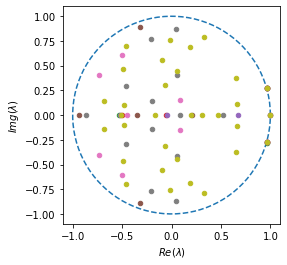

In [94]:
#eigenvalue study
plt.figure()
plt.gca().set_aspect('equal')

angles = np.linspace(0, 2 * np.pi, 100)
unit_circle = np.exp(1j * angles)
plt.plot(unit_circle.real, unit_circle.imag, '--', label = "Unit Circle")

for i in [0,1,2,3,4,5,6,7]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    w, v = np.linalg.eig(mat)

    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]

    print(w)
    # plt.matshow(mat)
    # plt.colorbar()
    # plt.figure()
    plt.plot(np.real(w), np.imag(w), ".", markersize = 9, label = f"Num Observables {models[i].num_obs}")

plt.xlabel(r"$Re(\lambda)$")
plt.ylabel(r"$Img(\lambda)$")
# plt.legend()

array([0.00057757+0.17871438j, 0.00057757-0.17871438j], dtype=complex64)

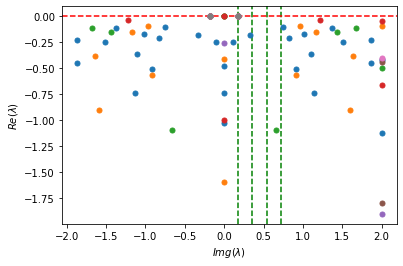

In [18]:
plt.figure()
plt.axvline(0.18, color='green', linestyle='--')
plt.axvline(0.36, color='green', linestyle='--')
plt.axvline(3*0.18, color='green', linestyle='--')
plt.axvline(4*0.18, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

# plt.text(0.17, 0.075, 'x = 0.17', color='green')
for i in [7,6,5,4,3,2,1,0]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    w, v = np.linalg.eig(mat)

    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]

    lamb = (np.log(w)/0.25)/(2*np.pi)
    plt.plot(np.imag(lamb[:]),np.real(lamb[:]),".", markersize = 10, label = f"Num Observables {models[i].num_obs}")

plt.ylabel(r"$Re(\lambda)$")
plt.xlabel(r"$Img(\lambda)$")

# plt.ylim(-0.1,0.1)
# plt.xlim(-1,1)
# plt.legend()
lamb

<Figure size 432x288 with 0 Axes>

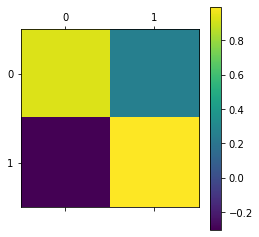

In [56]:
#Matrix
plt.figure()


for i in [0]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    plt.matshow(mat)
    plt.colorbar()
    # plt.figure()
    # plt.plot(np.real(w), np.imag(w), ".", label = f"Num Observables {models[i].num_obs}")

# plt.legend()

In [ ]:
error = np.zeros((1,models[-1].num_obs))
for i in range(error.shape[1]):
    error[0,i] = np.linalg.norm(mat*v[:,i] - w[i]*mat,ord="fro")
print(error)

In [ ]:
#decoding the eigenvectors
print(v.shape)
tv = torch.tensor(np.real(v)).to(models[-2].device)

koopmodes = models[-2].model.autoencoder.recover(tv)
koopmodes.shape

In [ ]:
plt.figure()
plt.scatter(sub_X,sub_Y,c=koopmodes.detach().cpu().numpy()[0,:], s=1, cmap = 'coolwarm')